In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import io
import re

def upload_file():
    uploaded = files.upload()
    return uploaded

def load_data(file_name, sheet_name=None):
    # Check if the file is an Excel file based on its extension
    if file_name.endswith('.xlsx') or file_name.endswith('.xls'):
        df = pd.read_excel(io.BytesIO(uploaded[file_name]), sheet_name=sheet_name)
    else:
        df = pd.read_csv(io.BytesIO(uploaded[file_name]))
    return df

def preprocess_data(df, target_col):
    # Fill missing values for numerical columns with median
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(target_col)
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

    # Fill missing values for categorical columns with mode
    cat_cols = df.select_dtypes(include=['object']).columns
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

    # Label encoding for categorical columns
    label_encoder = LabelEncoder()
    for column in cat_cols:
        df[column] = label_encoder.fit_transform(df[column])

    # Standardize numerical variables
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

    return df

def perform_eda(df):
    # Display basic statistics of numerical features
    print("Basic Statistics of Numerical Features:")
    print(df.describe())
    print("\n")

    # Display missing values count
    print("Missing Values Count:")
    print(df.isnull().sum())
    print("\n")

    # Visualize distribution of target variable
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Churn', data=df)
    plt.title('Distribution of Churn')
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.show()

    # Visualize correlation matrix with a mask for the upper triangle
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
    plt.title('Correlation Matrix')
    plt.show()

    # Visualize distribution of numerical features
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Visualize distribution of categorical features
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

def train_model(X_train, y_train):
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    return rf_classifier

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

def display_feature_importance(model, features):
    importances = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
    print(importance_df)



In [23]:
uploaded = upload_file()  # Prompt user to upload file
file_name = next(iter(uploaded))  # Assuming one file is uploaded, get the file name

# Specify the sheet name if your file is an Excel workbook; remove or set to None if not needed
sheet_name = 'E Comm'

df = load_data(file_name, sheet_name=sheet_name)

Saving BA - Assignment Part 1 data set.xlsx to BA - Assignment Part 1 data set (2).xlsx


In [24]:
df_preprocessed = preprocess_data(df, target_col='Churn')

Basic Statistics of Numerical Features:
        CustomerID        Churn        Tenure  PreferredLoginDevice  \
count  5630.000000  5630.000000  5.630000e+03           5630.000000   
mean      0.000000     0.168384  9.339283e-17              0.928419   
std       1.000089     0.374240  1.000089e+00              0.709822   
min      -1.731743     0.000000 -1.212618e+00              0.000000   
25%      -0.865872     0.000000 -8.536466e-01              0.000000   
50%       0.000000     0.000000 -1.357036e-01              1.000000   
75%       0.865872     0.000000  5.822395e-01              1.000000   
max       1.731743     1.000000  6.086470e+00              2.000000   

           CityTier  WarehouseToHome  PreferredPaymentMode       Gender  \
count  5.630000e+03     5.630000e+03           5630.000000  5630.000000   
mean   7.256875e-18     2.524131e-17              3.548135     0.601066   
std    1.000089e+00     1.000089e+00              1.389659     0.489723   
min   -7.152859e-01 

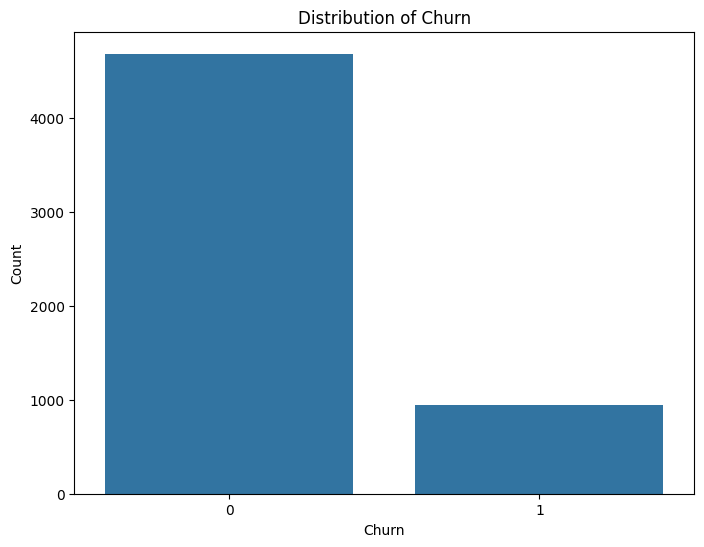

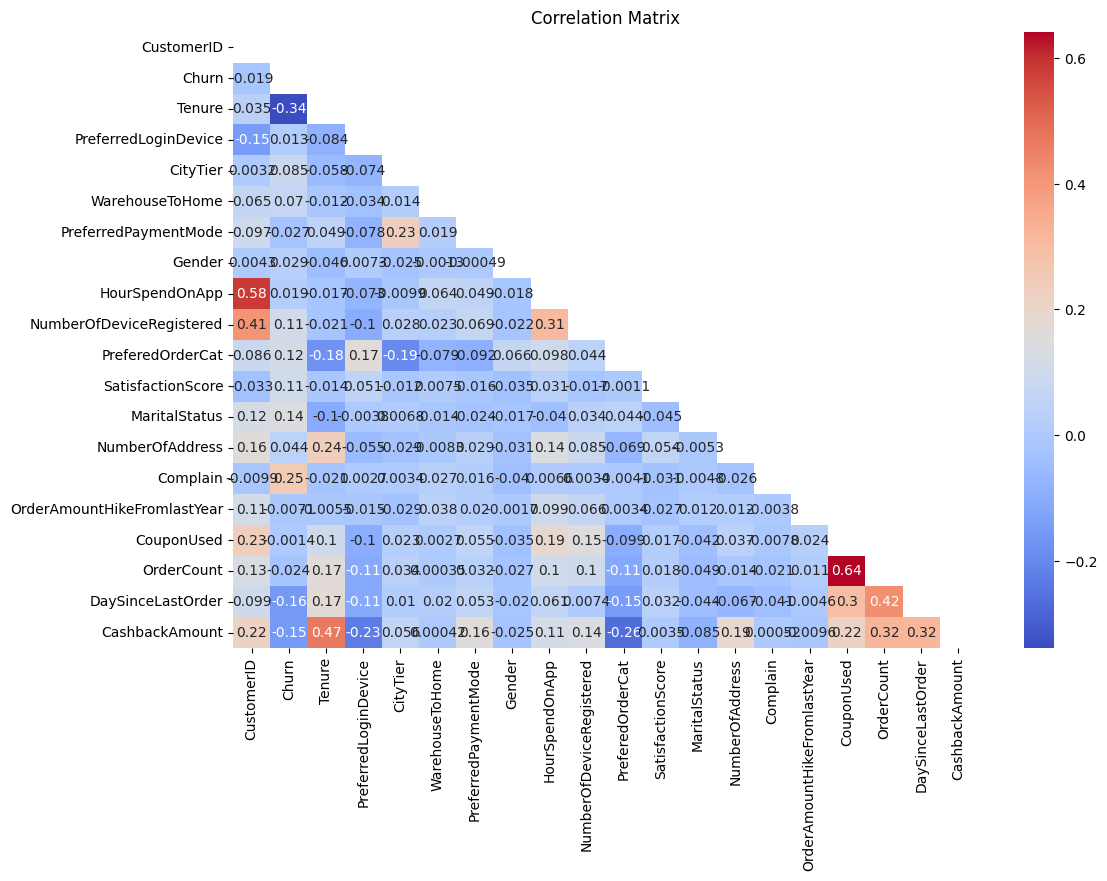

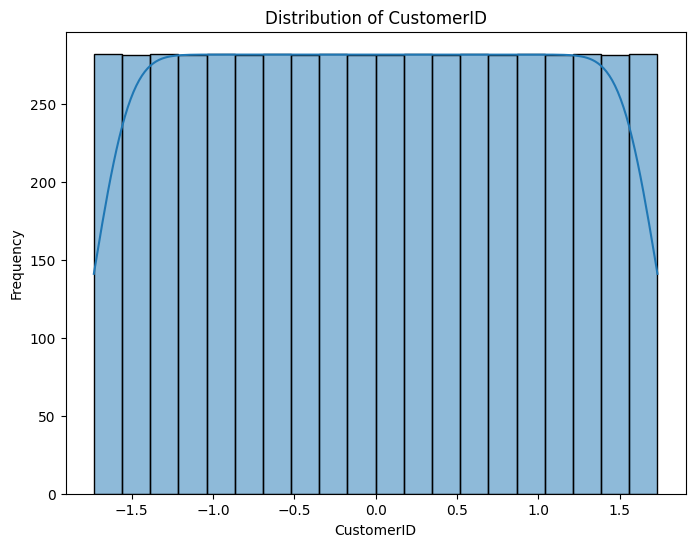

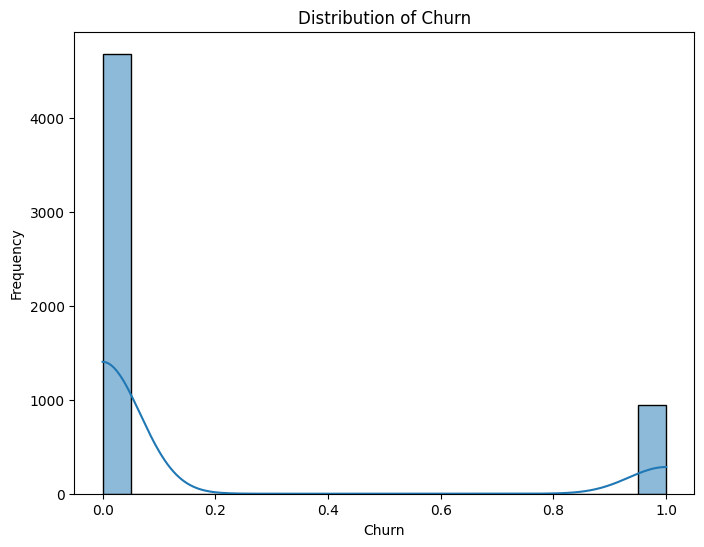

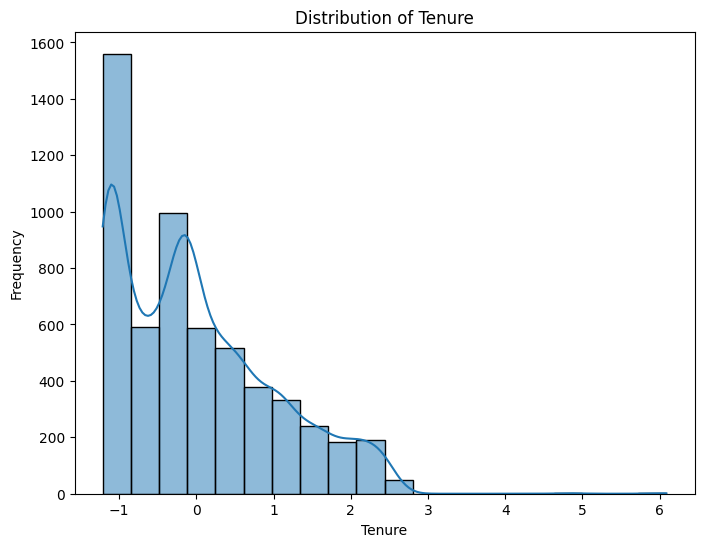

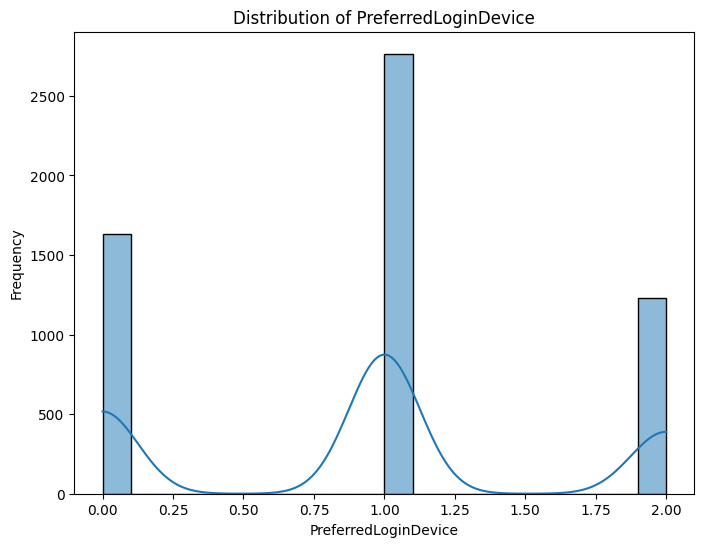

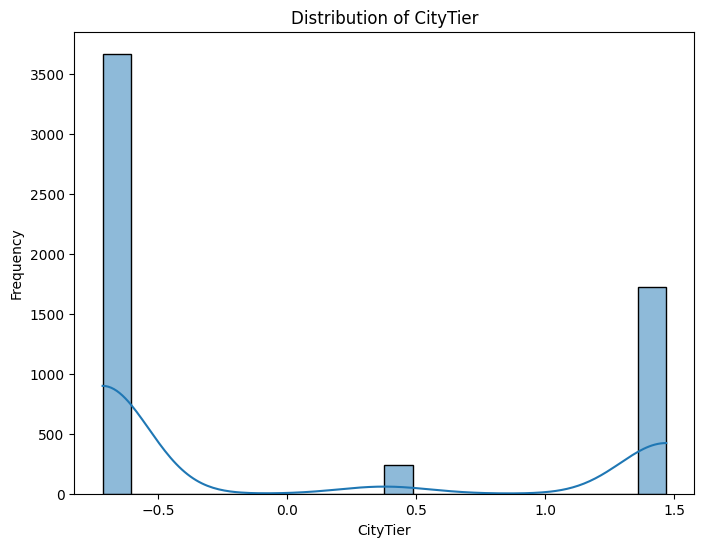

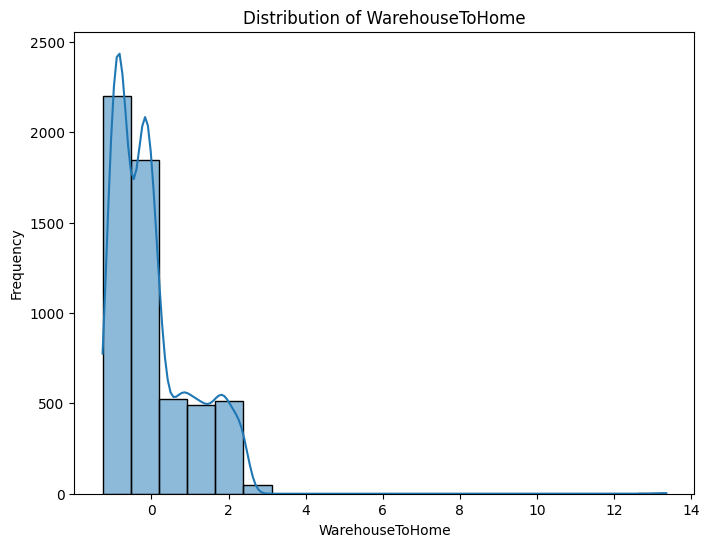

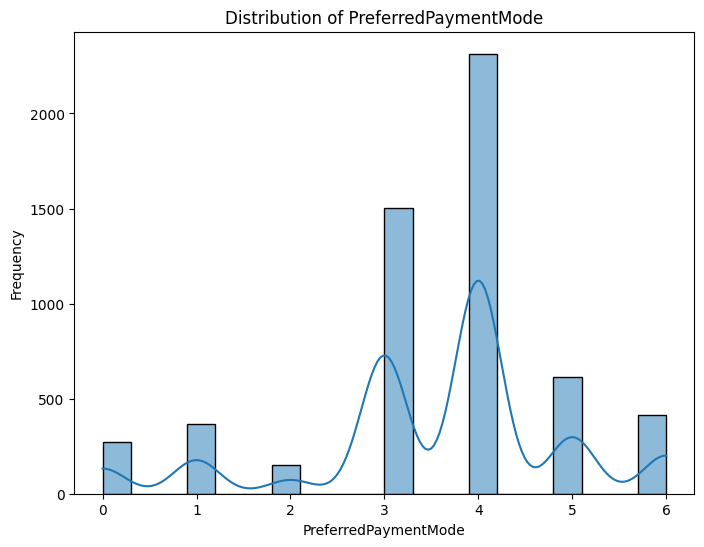

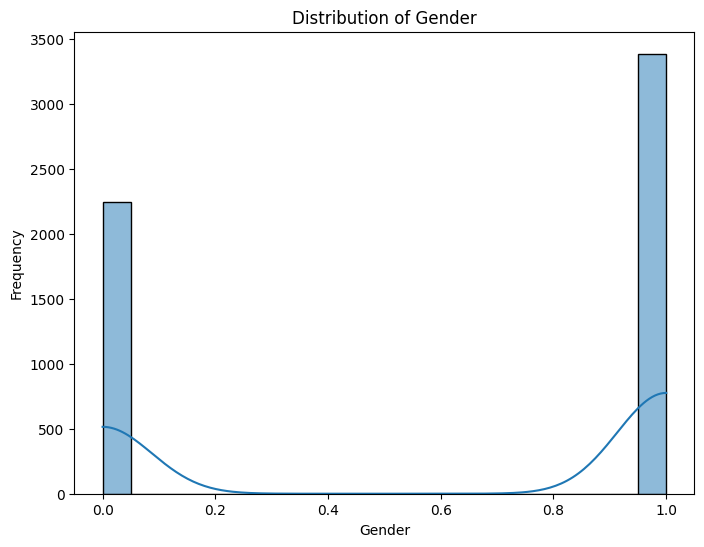

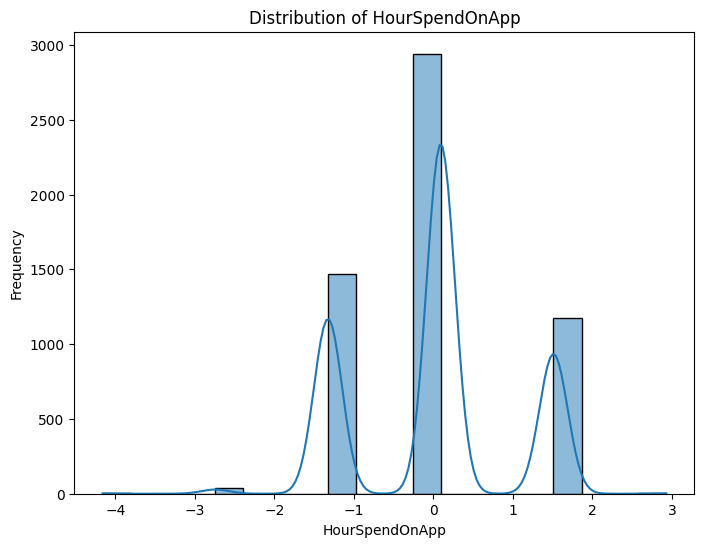

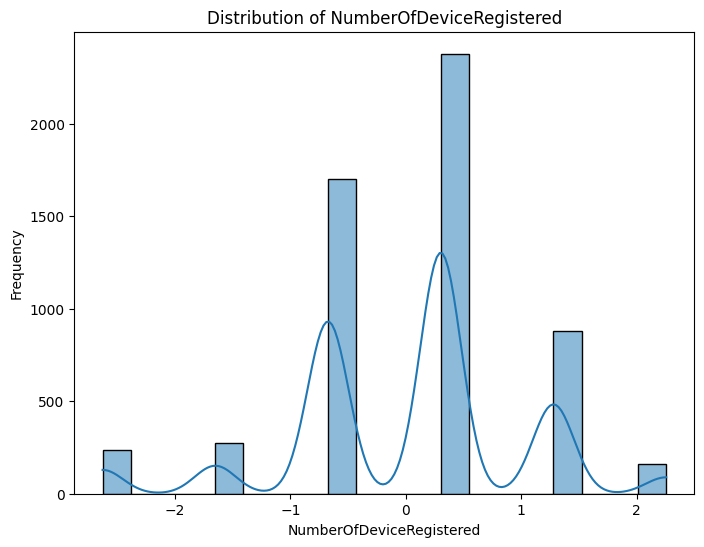

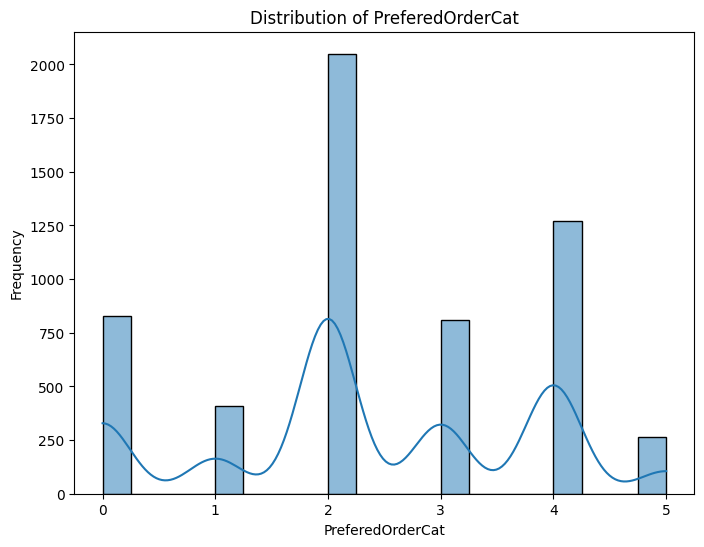

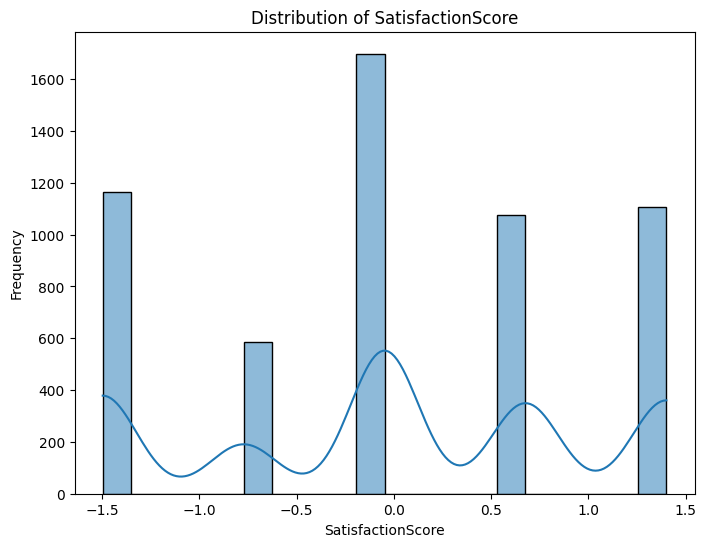

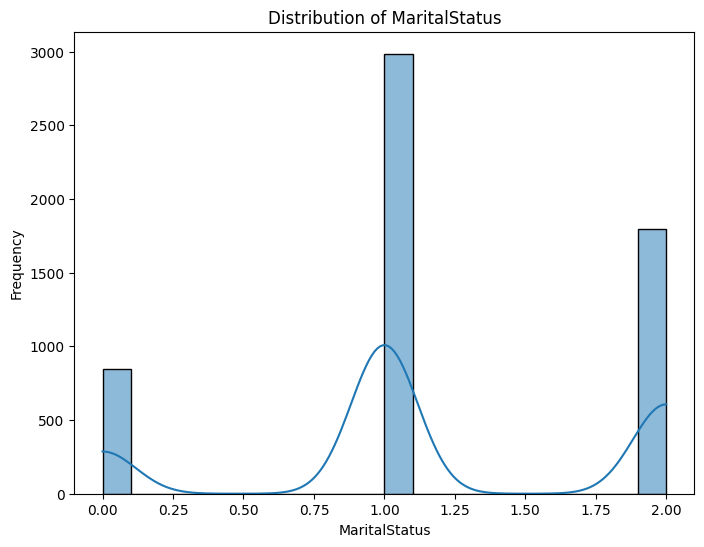

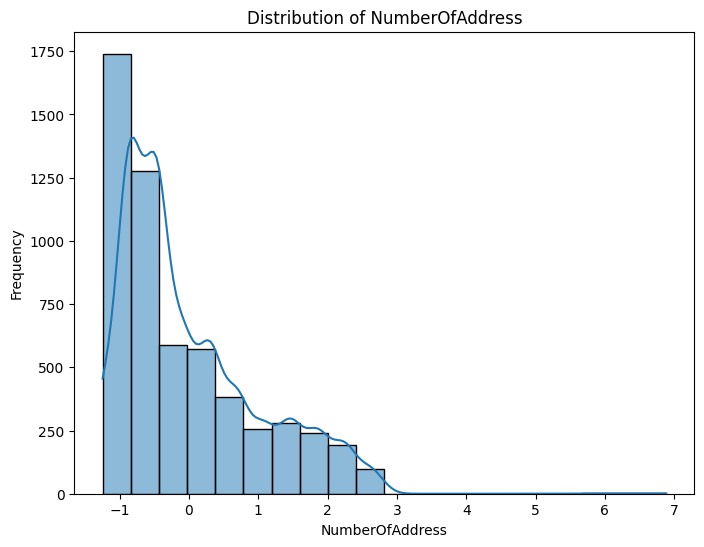

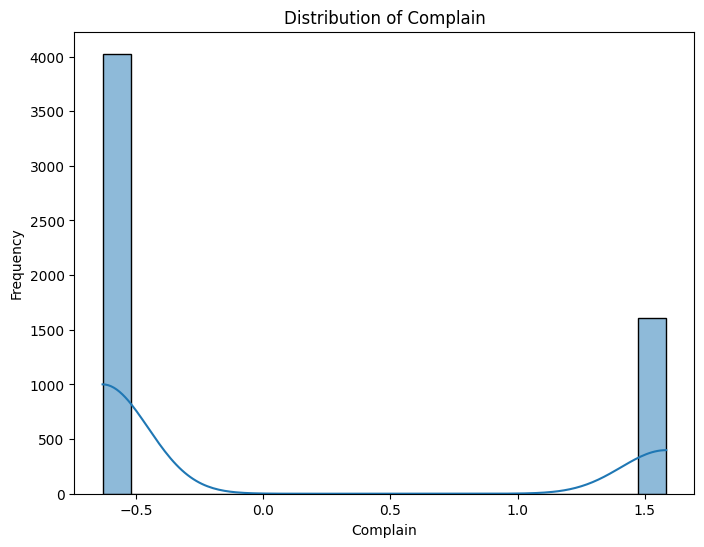

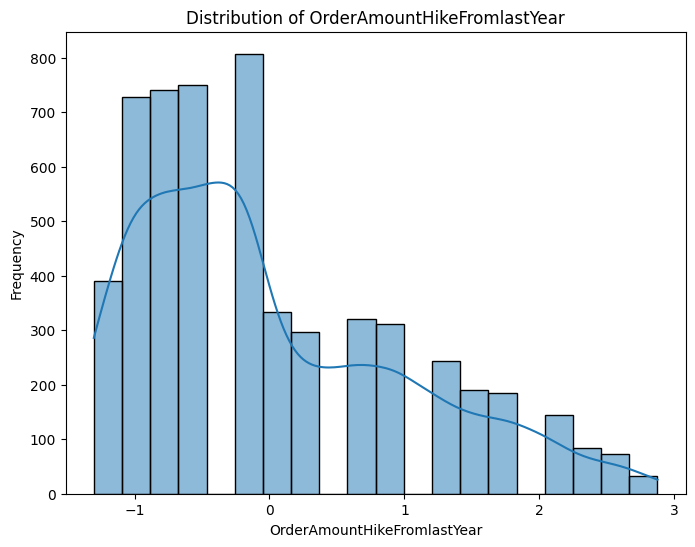

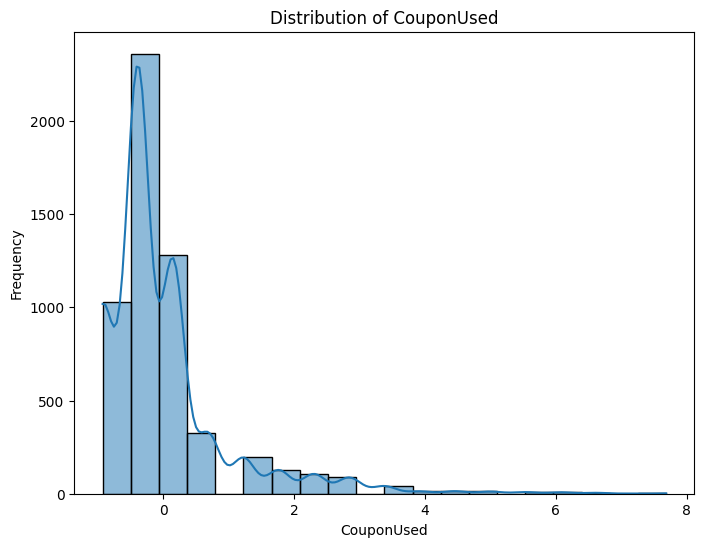

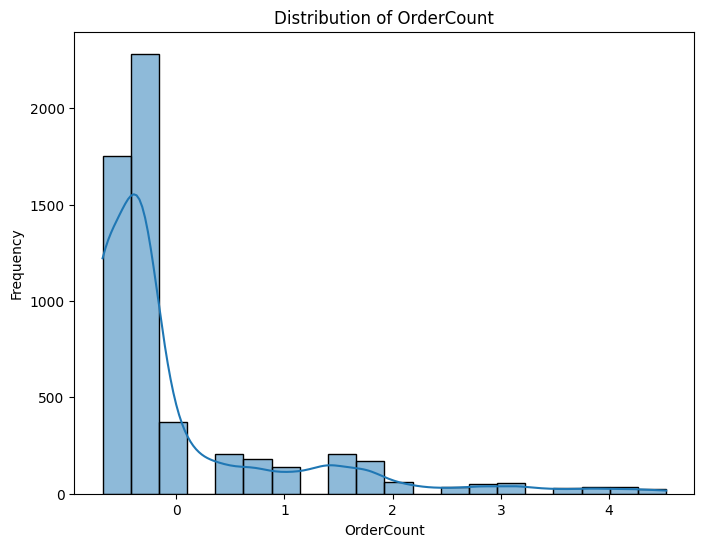

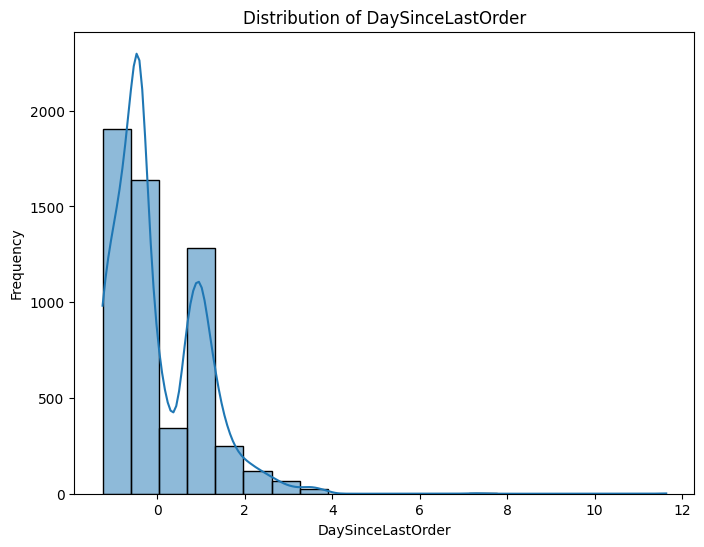

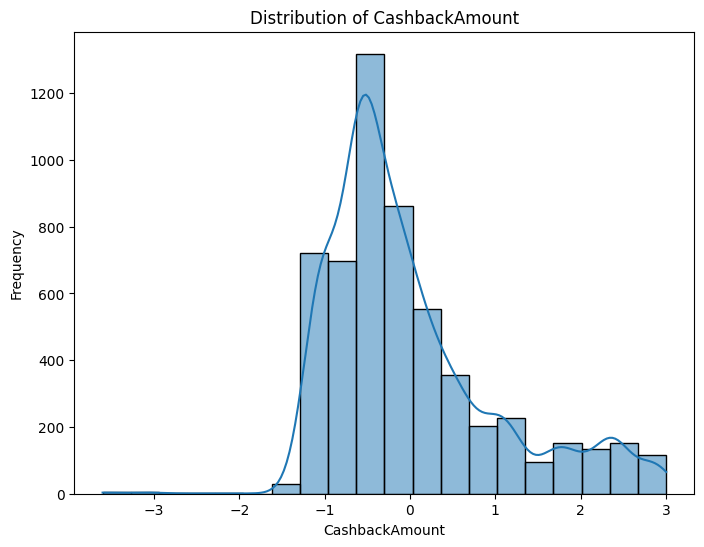

In [6]:
perform_eda(df_preprocessed)

In [25]:
X = df_preprocessed.drop('Churn', axis=1)
y = df_preprocessed['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
model = train_model(X_train, y_train)

In [27]:
evaluate_model(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       936
           1       0.96      0.83      0.89       190

    accuracy                           0.97      1126
   macro avg       0.96      0.91      0.93      1126
weighted avg       0.97      0.97      0.96      1126

Confusion Matrix:
 [[929   7]
 [ 32 158]]
ROC AUC Score: 0.9963900134952767


In [28]:
display_feature_importance(model, X.columns)

                        Feature  Importance
1                        Tenure    0.216677
18               CashbackAmount    0.097445
4               WarehouseToHome    0.068040
12              NumberOfAddress    0.064792
13                     Complain    0.061782
17            DaySinceLastOrder    0.058634
0                    CustomerID    0.058169
14  OrderAmountHikeFromlastYear    0.054111
10            SatisfactionScore    0.046295
5          PreferredPaymentMode    0.039005
9              PreferedOrderCat    0.038434
8      NumberOfDeviceRegistered    0.034435
11                MaritalStatus    0.031461
16                   OrderCount    0.027979
3                      CityTier    0.024504
15                   CouponUsed    0.024293
2          PreferredLoginDevice    0.022855
6                        Gender    0.016031
7                HourSpendOnApp    0.015060


**Model Evaluation:**
The RandomForestClassifier achieved an accuracy of 97% on the test set, with precision, recall, and F1-scores indicating strong performance across both classes (churned and not churned).
The ROC AUC Score is exceptionally high at approximately 0.996, suggesting excellent model performance in distinguishing between churned and not churned customers.

**Feature Importance:**
The top factors influencing customer churn, based on feature importance, are:

*Tenure*: The most important feature, indicating that the length of time a customer has been with the company significantly impacts their likelihood to churn.

*CashbackAmount*: The second most critical factor, suggesting that the amount of cashback a customer receives can influence their decision to stay or leave.

*WarehouseToHome*: Distance from the warehouse to the customer's home also plays a role, possibly affecting delivery times and satisfaction.

**Summary and Recommendations**:

**Tenure-Based Programs**
Early Engagement Offers: Implement a series of welcome offers for new sign-ups, such as exclusive discounts on their first few purchases or a welcome cashback bonus. This can help in immediately boosting their engagement and perceived value from the platform.

Milestone Rewards: Introduce milestone rewards for continued engagement. For example, after completing 3 months, 6 months, or a year, customers could unlock special offers or higher cashback percentages. This could also include access to premium services like expedited shipping or exclusive sales.

Loyalty Points System: Develop a loyalty points system where customers earn points for every purchase, which can be redeemed for discounts or free products. The rate at which points are earned could increase with the customer's tenure, encouraging long-term engagement.

**Cashback Amount Optimization**
Behavior-Based Cashback: Analyze purchasing behaviors to offer personalized cashback deals. For instance, customers frequently buying from a specific category (e.g., electronics) could receive higher cashback rates for that category.

Tiered Cashback Levels: Create a tiered cashback system where customers are placed into different tiers based on their purchase frequency or amount spent. Higher tiers could enjoy higher cashback rates, encouraging more frequent purchases.

Limited-Time Cashback Promotions: Run limited-time cashback promotions during festive seasons or special sales events. These promotions can be targeted based on customer preferences and previous shopping behavior to maximize engagement.

**Optimizing Delivery Experience**
Localized Warehouses: For customers far from warehouses, consider investing in localized distribution centers to reduce delivery times. This could significantly improve the shopping experience for a broad customer base.

Dynamic Delivery Options: Offer dynamic delivery options based on the distance from the warehouse, including same-day or next-day delivery for nearby customers. For those further away, provide accurate delivery time estimates and options for expedited shipping at a fee.

Enhanced Delivery Communication: Improve communication around delivery by providing real-time tracking, SMS updates, and flexible delivery scheduling. This can help set realistic expectations and improve customer satisfaction with the delivery process.


In [29]:
import pandas as pd
from textblob import TextBlob
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import re

def upload_file():
    uploaded = files.upload()
    return uploaded

def load_data(file_name):
    df = pd.read_csv(io.BytesIO(uploaded[file_name]))
    return df

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    text = text.lower().strip()  # Convert to lowercase
    return text

def classify_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

def preprocess_and_analyze(df):
    # Convert NaN values to an empty string or drop them
    df['Review Text'] = df['Review Text'].fillna('')
    # Now, apply the clean_text function
    df['Cleaned Review Text'] = df['Review Text'].apply(clean_text)
    # Apply sentiment analysis only on non-empty strings
    df['Sentiment'] = df['Cleaned Review Text'].apply(lambda x: classify_sentiment(x) if x != '' else 'Neutral')

    # Proceed with the sentiment distribution and visualization as before
    sentiment_distribution = df['Sentiment'].value_counts(normalize=True) * 100
    print("Sentiment Distribution:\n", sentiment_distribution)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')
    plt.show()

def find_key_themes(reviews, n=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(reviews.dropna())
    words = vectorizer.get_feature_names_out()
    sums = X.sum(axis=0)
    data = []
    for col, sum in enumerate(sums.tolist()[0]):
        data.append((words[col], sum))
    ranking = sorted(data, key=lambda x: x[1], reverse=True)
    return ranking[:n]


def display_key_themes(df):
    vectorizer = CountVectorizer(stop_words='english')
    matrix = vectorizer.fit_transform(df['Cleaned Review Text'].dropna())
    frequencies = sum(matrix).toarray()[0]
    freq_distribution = pd.DataFrame(frequencies, index=vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by='frequency', ascending=False)

    print("Top 10 Key Themes in Reviews:")
    print(freq_distribution.head(10))


In [31]:
uploaded = upload_file()  # Prompt user to upload file

Saving BA - Assignment Part 2 data set.csv to BA - Assignment Part 2 data set (1).csv


Sentiment Distribution:
 Positive    90.317636
Negative     5.679980
Neutral      4.002384
Name: Sentiment, dtype: float64


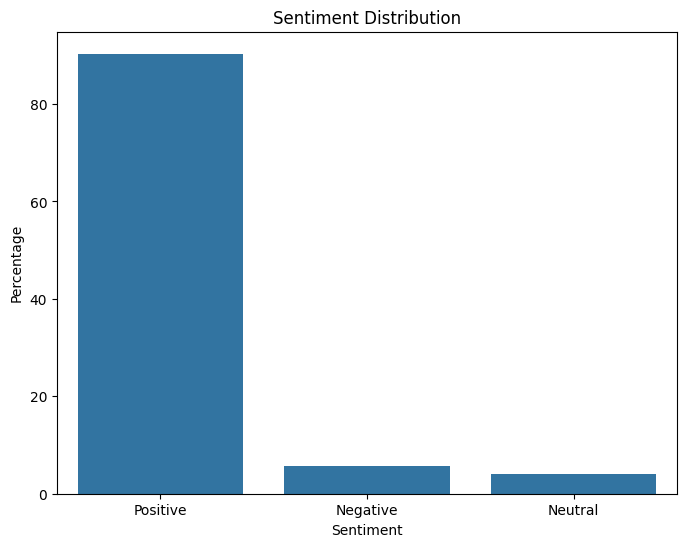

Key Themes in Positive Reviews: [('dress', 9867), ('love', 8745), ('size', 8160), ('fit', 7035), ('like', 6470), ('wear', 6082), ('great', 6028), ('im', 5661), ('just', 5260), ('fabric', 4441)]
Key Themes in Negative Reviews: [('dress', 560), ('size', 522), ('like', 500), ('small', 495), ('wear', 321), ('im', 317), ('fabric', 299), ('just', 299), ('little', 271), ('ordered', 259)]
Unique Words in Positive Reviews: {'love', 'great', 'fit'}
Unique Words in Negative Reviews: {'small', 'ordered', 'little'}
Top 10 Key Themes in Reviews:
        frequency
dress       10461
love         8916
size         8693
fit          7241
like         6992
wear         6414
great        6076
im           5988
just         5572
fabric       4755


In [32]:
file_name = next(iter(uploaded))  # Assuming one file is uploaded, get the file name
df2 = load_data(file_name)  # Load the uploaded data
preprocess_and_analyze(df2)  # Clean text, classify sentiment, and summarize distribution

positive_reviews = df2[df2['Sentiment'] == 'Positive']['Cleaned Review Text']
negative_reviews = df2[df2['Sentiment'] == 'Negative']['Cleaned Review Text']

# Finding key themes
key_themes_positive = find_key_themes(positive_reviews)
key_themes_negative = find_key_themes(negative_reviews)

# Displaying key themes and unique words
print("Key Themes in Positive Reviews:", key_themes_positive)
print("Key Themes in Negative Reviews:", key_themes_negative)

# Extract and compare words to find unique ones
positive_words = set([word for word, freq in key_themes_positive])
negative_words = set([word for word, freq in key_themes_negative])
unique_positive = positive_words - negative_words
unique_negative = negative_words - positive_words

print("Unique Words in Positive Reviews:", unique_positive)
print("Unique Words in Negative Reviews:", unique_negative)

display_key_themes(df2)  # Display key themes in the reviews


**Key Themes in Feedback**
**Positive Feedback Themes**:
Dress: Frequently mentioned in positive reviews, indicating satisfaction with dresses.

Love: A common word indicating strong positive feelings towards the products.
Size and Fit: Regularly discussed, suggesting that customers are generally satisfied with how products fit.

Wear: Indicates that customers find many items suitable for wearing on different occasions.

Great: Used to describe the overall quality and appeal of the products.

Fabric: Although it appears in both positive and negative contexts, in positive reviews, it might denote satisfaction with material quality.

**Negative Feedback Themes**:
Dress, Size, and Like: These also appear in negative feedback, suggesting issues with fit or expectations not being met for some dresses.

Small: Indicates issues with items being too small or sizing problems.
Fabric: In negative reviews, this might point to dissatisfaction with the material quality.

Little and Ordered: Could reflect on issues related to order fulfillment or product descriptions not matching the received item.

**Recommendations**
**Enhanced Quality Control for Fabric and Construction:**
Quality Assurance Teams: Establish dedicated quality assurance teams to perform thorough checks on the fabric and construction of each clothing item, especially those frequently mentioned in negative reviews.

Supplier Collaboration: Work closely with suppliers to ensure that the materials used meet specific quality standards. Consider developing fabric quality benchmarks that suppliers must meet or exceed.

**Improved Sizing Accuracy and Guidance:**
Virtual Sizing Assistant: Implement a virtual sizing assistant on the product pages that uses customer input (such as height, weight, and preferred fit) to recommend the best size for them.

Customer Fit Reviews: Encourage customers to share their body measurements along with their size reviews to help others make better sizing decisions. Offer incentives, such as loyalty points, for detailed reviews.

**Enhanced Product Descriptions and Visuals:**
360-Degree Product Views: Provide 360-degree views of products and videos of models wearing the items to offer customers a better understanding of the fit and flow of garments.

Material Descriptions: Include detailed descriptions of fabric types, weights, and care instructions. Use icons or visual guides to help customers quickly grasp the fabric qualities.

**Targeted Improvements Based on Feedback:**
Feedback Loop for Design Improvements: Establish a systematic process for incorporating customer feedback into product design and development. Regularly review negative feedback for insights that could lead to design modifications or enhancements.

Size and Fit Focus Groups: Conduct focus groups or surveys targeted at understanding common sizing issues. Use this data to adjust sizing charts or redesign products for a better fit.

**Customer Engagement and Retention Strategies:**
Engagement Programs for High-Value Customers: Develop personalized engagement programs for customers who provide valuable feedback, both positive and negative. This could include exclusive previews of new collections or the opportunity to participate in focus groups.

Responsive Customer Service: Enhance customer service training to ensure that representatives are well-equipped to handle feedback and complaints related to fabric, fit, and sizing. Quick and empathetic responses can turn negative experiences into positive ones.

**Leveraging Technology for Feedback Analysis:**
Sentiment Analysis Tools: Continuously monitor customer reviews using advanced sentiment analysis tools to quickly identify shifts in customer sentiment or emerging issues with specific products.

Data-Driven Product Adjustments: Use data analytics to correlate product returns and exchanges with specific feedback themes, enabling targeted adjustments to product lines or individual items.
